# 🚀 Flujo Completo: Dataset → Entrenamiento → Clasificación

Este notebook integra los 3 módulos principales del proyecto:
1. **GeneradorDataset**: Genera datos de letras con distorsión
2. **MLP**: Red neuronal que aprende a clasificar
3. **ClasificadorLetras**: Interfaz para usar y evaluar el modelo

## 📦 Paso 1: Importar Librerías y Módulos

---
⚠️ **IMPORTANTE**: Este notebook debe ejecutarse **EN ORDEN** celda por celda.
- Puedes usar **"Run All"** (Ctrl+Shift+Alt+Enter) para ejecutar todas las celdas
- O ejecutar celda por celda con **Shift+Enter**

**NO saltes pasos**, especialmente el **Paso 8: Entrenar** que es crítico.

---

In [4]:
# Librerías estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Módulos del proyecto
from generador_dataset import GeneradorDataset
from mlp import MLP
from clasificador import ClasificadorLetras

print("✅ Librerías y módulos importados correctamente")

✅ Librerías y módulos importados correctamente


---
# 🏭 PARTE 1: Generación de Datos

Generamos un dataset de 500 ejemplos con distorsiones específicas.

## 🎯 Paso 2: Crear el Generador

In [7]:
generador = GeneradorDataset()
print(f"✅ GeneradorDataset creado")
print(f"   Letras: {generador.letras}")

✅ GeneradorDataset creado
   Letras: ['B', 'D', 'F']


## 📊 Paso 3: Generar Datasets

In [33]:
cantidad = 500
distorsiones = [10, 10, 10]

print(f"🎯 Generando {cantidad} ejemplos con distorsiones {distorsiones}%")
print("="*60)

# Generar originales
generador.generar_data_letras(cantidad)

# Generar distorsionados
generador.generar_data_con_distorsiones_especificas(
    cant=cantidad,
    distorsiones=distorsiones,
    mezclar=False
)

print("="*60)
print("✅ Datasets generados!")

🎯 Generando 500 ejemplos con distorsiones [10, 10, 10]%
✅ Dataset original de 500 ejemplos guardado en: C:\Leo\Inteligencia Artificial\perceptron2\data\originales\500\letras.csv
   📌 Datos en orden (sin mezclar) para comparación
✅ Dataset con distorsiones específicas guardado en: C:\Leo\Inteligencia Artificial\perceptron2\data\distorsionadas\500\letras.csv
   - Total ejemplos: 500
   - Distribución: {10: 166}
   - Distorsiones aplicadas: [10, 10, 10]%
✅ Datasets generados!


## 📂 Paso 4: Cargar los Datos

In [36]:
def leer_dataset(cantidad, tipo='originales'):
    file_path = os.path.join('data', tipo, str(cantidad), 'letras.csv')
    df = pd.read_csv(file_path, sep=';', header=None)
    X = df.iloc[:, :100].values
    y = df.iloc[:, 100:].values
    return X, y

X_orig, y_orig = leer_dataset(cantidad, 'originales')
X_dist, y_dist = leer_dataset(cantidad, 'distorsionadas')

# Diccionario para mapear índices a letras
letras_map = {0: 'B', 1: 'D', 2: 'F'}

print(f"✅ Datos cargados: {len(X_dist)} ejemplos")

✅ Datos cargados: 500 ejemplos


## 🔍 Paso 5: Visualizar Ejemplos

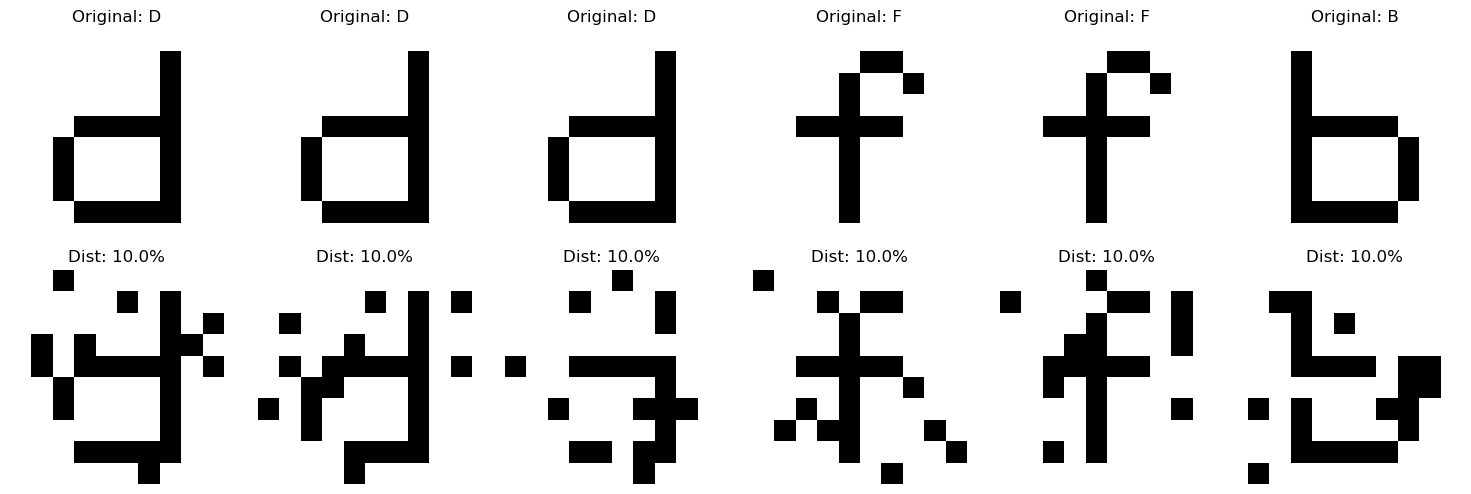

In [39]:
fig, axes = plt.subplots(2, 6, figsize=(15, 5))

for i in range(6):
    letra = letras_map[np.argmax(y_orig[i])]
    
    axes[0, i].imshow(X_orig[i].reshape(10, 10), cmap='binary')
    axes[0, i].set_title(f'Original: {letra}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(X_dist[i].reshape(10, 10), cmap='binary')
    dist = np.sum(X_dist[i] != X_orig[i]) / 100 * 100
    axes[1, i].set_title(f'Dist: {dist:.1f}%')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

---
# 🧠 PARTE 2: Entrenamiento del MLP

## 🔄 Paso 6: Preparar Datos

In [43]:
indices = np.arange(len(X_dist))
np.random.shuffle(indices)

X_train = X_dist[indices]
y_train = y_dist[indices]

print(f"✅ Datos mezclados: {len(X_train)} ejemplos")

✅ Datos mezclados: 500 ejemplos


## 🏗️ Paso 7: Crear MLP

In [46]:
mlp = MLP(
    arquitectura=[100, 10, 3],
    funciones_activacion=['sigmoidal', 'sigmoidal'],
    learning_rate=0.1,
    momentum=0.9
)

print("✅ MLP creado: 100 → 10 → 3")

MLP creado con arquitectura: [100, 10, 3]
Funciones de activación: ['sigmoidal', 'sigmoidal']
Learning rate: 0.1, Momentum: 0.9
✅ MLP creado: 100 → 10 → 3


## 🎯 Paso 8: Entrenar

In [49]:
print("🎯 Entrenando...")
print("="*60)

historial = mlp.entrenar(X_train, y_train, epochs=1000, verbose=True)

print("="*60)
print(f"✅ Entrenamiento completado!")
print(f"   Error final: {historial[-1]:.6f}")

🎯 Entrenando...
Época 0/1000 - Error (MSE): 0.381490
Época 100/1000 - Error (MSE): 0.000272
Época 200/1000 - Error (MSE): 0.000067
Época 300/1000 - Error (MSE): 0.000029
Época 400/1000 - Error (MSE): 0.000016
Época 500/1000 - Error (MSE): 0.000010
Época 600/1000 - Error (MSE): 0.000007
Época 700/1000 - Error (MSE): 0.000005
Época 800/1000 - Error (MSE): 0.000004
Época 900/1000 - Error (MSE): 0.000003
Época 999/1000 - Error (MSE): 0.000002
✅ Entrenamiento completado!
   Error final: 0.000002


## 📈 Paso 9: Curva de Aprendizaje

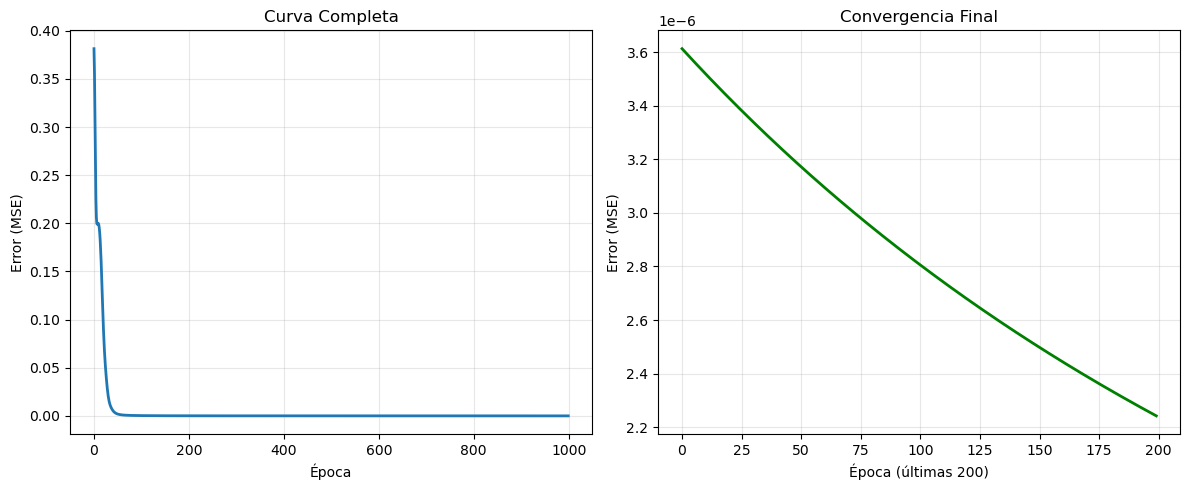

In [52]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(historial, linewidth=2)
plt.xlabel('Época')
plt.ylabel('Error (MSE)')
plt.title('Curva Completa')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(historial[-200:], linewidth=2, color='green')
plt.xlabel('Época (últimas 200)')
plt.ylabel('Error (MSE)')
plt.title('Convergencia Final')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# 🎛️ PARTE 3: Clasificación y Evaluación

## 🎨 Paso 10: Crear Clasificador

In [56]:
clasificador = ClasificadorLetras(mlp)
print("✅ Clasificador creado")

✅ Clasificador creado


## 🧪 Paso 11: Evaluar Precisión

In [59]:
aciertos = 0
for i in range(len(X_dist)):
    resultado = clasificador.clasificar_patron(X_dist[i])
    pred = resultado['letra']
    real = letras_map[np.argmax(y_dist[i])]
    if pred == real:
        aciertos += 1

precision = (aciertos / len(X_dist)) * 100
print(f"✅ Precisión: {precision:.2f}%")
print(f"   Aciertos: {aciertos}/{len(X_dist)}")

✅ Precisión: 100.00%
   Aciertos: 500/500


## 🔍 Paso 12: Visualizar Predicciones

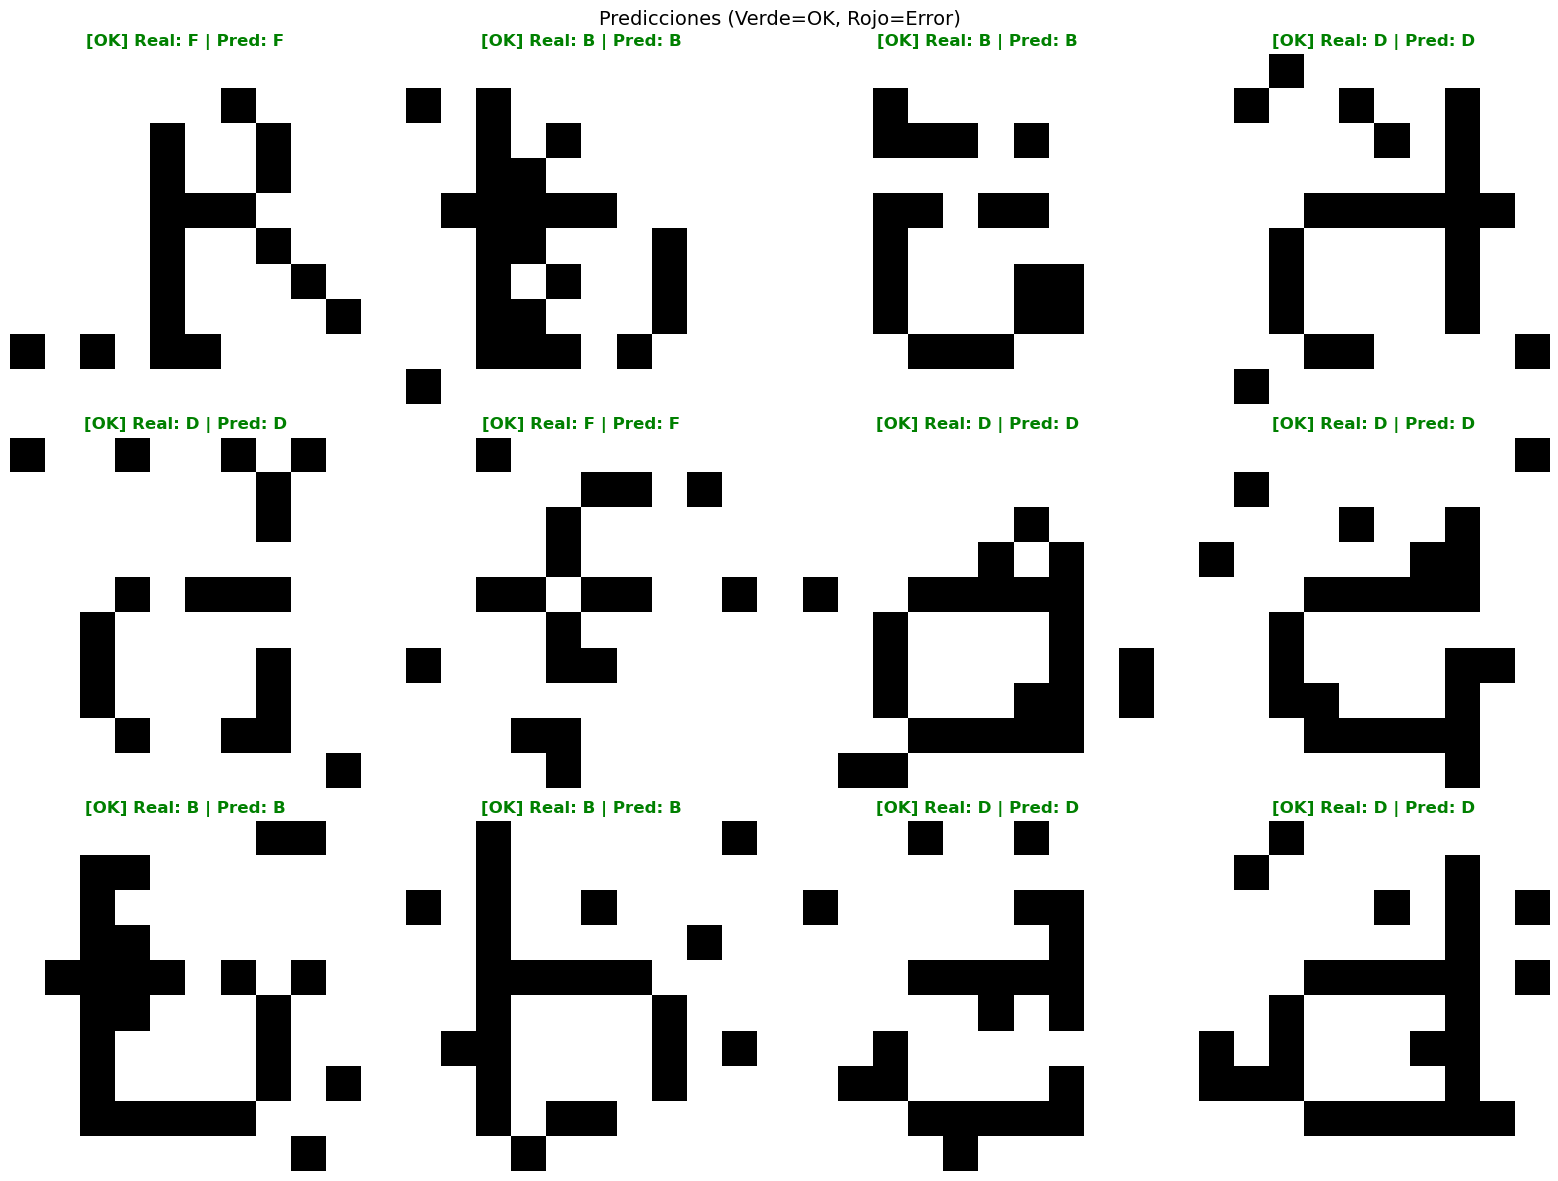

In [62]:
indices_random = np.random.choice(len(X_dist), 12, replace=False)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, i in enumerate(indices_random):
    resultado = clasificador.clasificar_patron(X_dist[i])
    pred = resultado['letra']
    real = letras_map[np.argmax(y_dist[i])]
    correcto = "[OK]" if pred == real else "[ERROR]"
    color = 'green' if pred == real else 'red'
    
    axes[idx].imshow(X_dist[i].reshape(10, 10), cmap='binary')
    axes[idx].set_title(f'{correcto} Real: {real} | Pred: {pred}', 
                        color=color, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Predicciones (Verde=OK, Rojo=Error)', fontsize=14)
plt.tight_layout()
plt.show()

## 🎯 Paso 13: Probar Robustez

In [64]:
print("🧪 Probando robustez...")
print("="*60)

for letra in ['B', 'D', 'F']:
    print(f"\n📝 Letra {letra}:")
    clasificador.probar_distorsiones(
        letra=letra,
        distorsiones=[0, 5, 10, 15, 20, 25, 30],
        num_pruebas=20
    )

print("\n" + "="*60)

🧪 Probando robustez...

📝 Letra B:


TypeError: ClasificadorLetras.probar_distorsiones() got an unexpected keyword argument 'num_pruebas'

## 📈 Paso 14: Gráfica de Robustez

In [ ]:
resultados = clasificador.evaluar_robustez(
    distorsiones=[0, 5, 10, 15, 20, 25, 30],
    num_pruebas_por_letra=50
)

plt.figure(figsize=(12, 7))
plt.plot(resultados['distorsiones'], resultados['precision_B'], 'o-', label='B', linewidth=2)
plt.plot(resultados['distorsiones'], resultados['precision_D'], 's-', label='D', linewidth=2)
plt.plot(resultados['distorsiones'], resultados['precision_F'], '^-', label='F', linewidth=2)
plt.plot(resultados['distorsiones'], resultados['precision_global'], 'D-', 
         label='Global', linewidth=3, color='black')

plt.xlabel('Distorsión (%)', fontsize=12, fontweight='bold')
plt.ylabel('Precisión (%)', fontsize=12, fontweight='bold')
plt.title('Robustez del Modelo', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0, 105])
plt.tight_layout()
plt.show()

## 💾 Paso 15: Guardar Modelo

In [ ]:
nombre = 'modelo_completo.json'
clasificador.guardar_modelo(nombre)
print(f"💾 Modelo guardado: {nombre}")